# Seminar 9 - Answers

Read the text in the box named "Can You Beat the Market?" in pages 564 and 565 of the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

<b>

Download the dataset [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Stock_Returns_1931_2002.xlsx) and answer the following questions below
    
</b>

<b>

1. Plot the series ExReturn and ln_DivYield.

</b>

In [21]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.graphics.tsaplots as sts
import statsmodels.tsa.arima_process as sta
import statsmodels.tsa.arima.model as stm
import statsmodels.tsa.ar_model as arm
import statsmodels.tsa.stattools as stt
import statsmodels.tsa.api as tsa

In [22]:
# Loading the data set

df = pd.read_excel("Stock_Returns_1931_2002.xlsx")
df

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,time,Month,ExReturn,ln_DivYield
0,1931,1,5.964958,-282.232866
1,1931,2,10.305305,-293.208902
2,1931,3,-6.840831,-287.861414
3,1931,4,-10.448065,-278.247705
4,1931,5,-14.358077,-265.474152
...,...,...,...,...
859,2002,8,1.005623,-394.593048
860,2002,9,-10.463990,-383.587520
861,2002,10,5.908229,-388.606290
862,2002,11,4.742755,-393.471897


<function matplotlib.pyplot.show(close=None, block=None)>

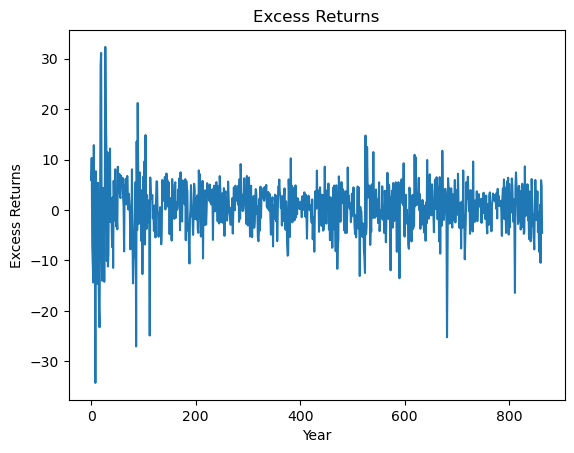

In [23]:
# Plotting the Excess Returns series

plt.plot(df.ExReturn)

title = "Excess Returns"

plt.title(title)                             # Plot title
plt.xlabel("Year")                           # Plot x-axis label
plt.ylabel("Excess Returns")                  # Plot y-axis label

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

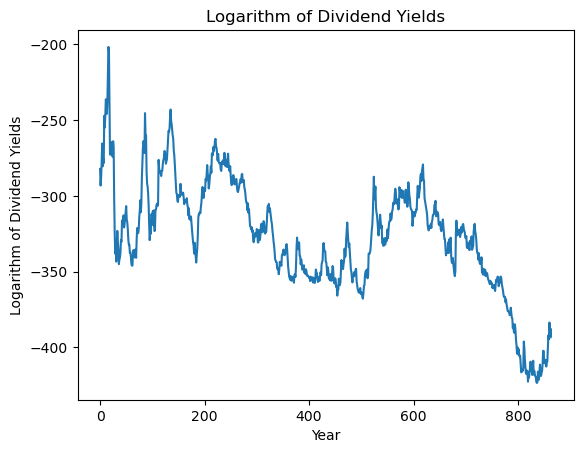

In [24]:
# Plotting the Excess Returns series

plt.plot(df.ln_DivYield)

title = "Logarithm of Dividend Yields"

plt.title(title)                             # Plot title
plt.xlabel("Year")                           # Plot x-axis label
plt.ylabel("Logarithm of Dividend Yields")   # Plot y-axis label

plt.show

<b>

2. Repeat the calculations reported in Table 15.2 using regressions estimated over the 1931:M1–2002:M12 sample period. <br>
    
You should fit the AR(1), AR(2) and AR(4) models for the excess reutrn.<br>
    
Write the regression equations of the models you are estimating.<br>
 
</b>


The AR(1) model for the Excess Return is

$$ ExReturn_{t} = \phi_{0} + \phi_{1}ExReturn_{t-1} + u_{t} $$


In [25]:
# Estimating an AR(1) for the Excess Return

ar1 = arm.AutoReg(df.ExReturn,lags=1).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               ExReturn   No. Observations:                  864
Model:                     AutoReg(1)   Log Likelihood               -2672.817
Method:               Conditional MLE   S.D. of innovations              5.356
Date:                Mon, 29 Apr 2024   AIC                           5351.634
Time:                        14:00:58   BIC                           5365.915
Sample:                             1   HQIC                          5357.100
                                  864                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4540      0.183      2.479      0.013       0.095       0.813
ExReturn.L1     0.0822      0.034      2.424      0.015       0.016       0.149
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           12.1593           +0.0000j           12.1593            0.0000
-----------------------------------------------------------------------------
"""



The fitted AR(1) model for the Excess Return is

$$ \hat{ExReturn_{t}} = 0.4540 + 0.0822 \times ExReturn_{t-1} $$
    




The AR(2) model for the Excess Return is

$$ ExReturn_{t} = \phi_{0} + \phi_{1}ExReturn_{t-1} + \phi_{2}ExReturn_{t-2} + u_{t} $$
    


In [26]:
# Estimating an AR(2) for the Excess Return

ar2 = arm.AutoReg(df.ExReturn,lags=2).fit()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               ExReturn   No. Observations:                  864
Model:                     AutoReg(2)   Log Likelihood               -2668.565
Method:               Conditional MLE   S.D. of innovations              5.349
Date:                Mon, 29 Apr 2024   AIC                           5345.131
Time:                        14:00:59   BIC                           5364.168
Sample:                             2   HQIC                          5352.418
                                  864                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4520      0.184      2.461      0.014       0.092       0.812
ExReturn.L1     0.0816      0.034      2.399      0.016       0.015       0.148
ExReturn.L2    -0.0168      0.034     -0.494      0.621      -0.083       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4265           -7.3209j            7.7126           -0.1991
AR.2            2.4265           +7.3209j            7.7126            0.1991
-----------------------------------------------------------------------------
"""


The fitted AR(1) model for the Excess Return is

$$ \hat{ExReturn_{t}} = 0.4520 + 0.0816 \times ExReturn_{t-1} -0.0168 \times ExReturn_{t-2} $$
    



The AR(4) model for the Excess Return is

$$ ExReturn_{t} = \phi_{0} + \phi_{1}ExReturn_{t-1} + \phi_{2}ExReturn_{t-2} + \phi_{3}ExReturn_{t-3} + \phi_{4}ExReturn_{t-4} + u_{t} $$
    


In [27]:
# Estimating an AR(4) for the Excess Return

ar4 = arm.AutoReg(df.ExReturn,lags=4).fit()
ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               ExReturn   No. Observations:                  864
Model:                     AutoReg(4)   Log Likelihood               -2655.513
Method:               Conditional MLE   S.D. of innovations              5.306
Date:                Mon, 29 Apr 2024   AIC                           5323.026
Time:                        14:01:01   BIC                           5351.567
Sample:                             4   HQIC                          5333.953
                                  864                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4948      0.184      2.691      0.007       0.134       0.855
ExReturn.L1     0.0840      0.034      2.467      0.014       0.017       0.151
ExReturn.L2    -0.0027      0.034     -0.081      0.936      -0.069       0.064
ExReturn.L3    -0.1018      0.034     -3.003      0.003      -0.168      -0.035
ExReturn.L4     0.0397      0.034      1.167      0.243      -0.027       0.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8775           -0.0000j            1.8775           -0.5000
AR.2            0.6367           -1.9569j            2.0578           -0.1999
AR.3            0.6367           +1.9569j            2.0578            0.1999
AR.4            3.1661           -0.0000j            3.1661           -0.0000
-----------------------------------------------------------------------------
"""

The fitted AR(4) model for the Excess Return is

$$ \hat{ExReturn_{t}} = 0.4948 + 0.0840 \times ExReturn_{t-1} -0.0027 \times ExReturn_{t-2} -0.1018 \times ExReturn_{t-3} + 0.0397 \times ExReturn_{t-4}$$
    


<b>
    
3. Use the ADF test for stationary of the ExReturn series. Based on the result of the test, is the Excess Return series stationary?
    
</b>

In [28]:
test = stt.adfuller(df.ExReturn)
# Retrieving the ADF test statistic and p-value for the GDP series

adf_statistic = test[0]
p_value = test[1]

# Printing ADF test statistic and p-value for the GDP series
print(adf_statistic)
print(p_value)

-8.000838207693803
2.336368822902236e-12


The p-value is $2.33 \times 10^{-12}$, which is lower than $\alpha = 5\%$ and therefore we reject the null hypothesis. 

The null hypothesis is that the series is non-stationary and therefore we have evidence that the series is stationary.

<b>

4. Construct pseudo out-of-sample forecasts of excess returns over the 1983:M1–2002:M12 period using regressions that begin in 1931:M1

(You might need to slice your data set so that you fit the model only using observations such that the time column is less than 1983).   
   
</b>

In [29]:
# Slicing the data set to use observations from 1960 onwards in our regression

df_3182 = df[df.time < 1983]
df_3182

,time,Month,ExReturn,ln_DivYield
0,1931,1,5.964958,-282.232866
1,1931,2,10.305305,-293.208902
2,1931,3,-6.840831,-287.861414
3,1931,4,-10.448065,-278.247705
4,1931,5,-14.358077,-265.474152
...,...,...,...,...
619,1982,8,10.936692,-289.019991
620,1982,9,0.728240,-289.980514
621,1982,10,10.467970,-301.474031
622,1982,11,3.895520,-303.494271


In [30]:
# Estimating an AR(1) for the Excess Return for the period 1931 - 1982

ar1_3182 = arm.AutoReg(df_3182.ExReturn,lags=1).fit()

# Estimating out-of-sample forecasts for the period 1983 - 2002

start = len(df_3182.ExReturn)
end = len(df.ExReturn) - 1

forecast_ar1 = ar1_3182.predict(start=start,end=end)

<b>

5. Plot the pseudo out-of-sample forecasts against the actual excess returns after 1983.
    
</b>

<function matplotlib.pyplot.show(close=None, block=None)>

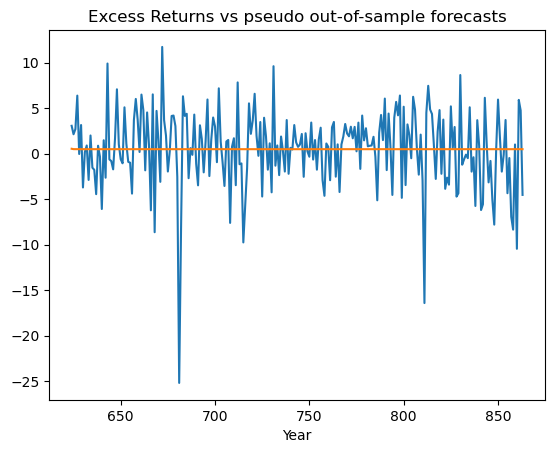

In [31]:
# Plotting the Excess Returns series vs pseudo out-of-sample forecasts

plt.plot(df.ExReturn[df.time >= 1983])
plt.plot(forecast_ar1)

title = "Excess Returns vs pseudo out-of-sample forecasts"

plt.title(title)                             # Plot title
plt.xlabel("Year")                        # Plot x-axis label

plt.show

<b>

6. Fit a Distributed Model model for the Excess Returns using the log of Dividend Yield. Write the model down.
    
</b>

In [32]:
# Fitting a distributed model for the excess returns and log of dividend yield

formula = "ExReturn ~ ln_DivYield"

model = smf.ols(formula, df).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ExReturn   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.061
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0806
Time:                        14:01:11   Log-Likelihood:                -2676.1
No. Observations:                 864   AIC:                             5356.
Df Residuals:                     862   BIC:                             5366.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.2487      2.235     -1.454      

The estimated distributed lag model is

$$ \hat{ExReturn_{t}} = -3.25 - 0.01 \times log(DivYield)_t  $$

<b>

7. Is the coefficient for the log of dividend yield significant?
    
</b>

No, as the p-value is 0.080, which is greater than 0.05. Alternatively we note that the absolute value of the t-statistic is 1.749 which is greater than the critical value of 1.96.

<b>

8. Create a residual plot for this model. Discuss the fit of the model.
    
</b>

Text(0, 0.5, 'Residuals')

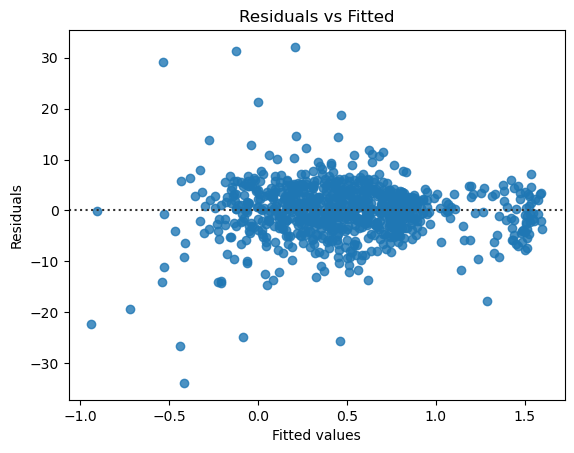

In [34]:
# Residual Plot for the Distributed Lag Model

residual_plot = plt.figure()
sns.residplot(data=df, x=model.fittedvalues, y='ExReturn')

residual_plot.axes[0].set_title('Residuals vs Fitted')
residual_plot.axes[0].set_xlabel('Fitted values')
residual_plot.axes[0].set_ylabel('Residuals')